In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r'C:\Users\Rishabh Giri\Downloads\archive (9)\train'
val_dir = r'C:\Users\Rishabh Giri\Downloads\archive (9)\val'
test_dir = r'C:\Users\Rishabh Giri\Downloads\archive (9)\test'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/20
131/131 [==============================] - 138s 1s/step - loss: 0.5343 - accuracy: 0.7400 - val_loss: 0.6355 - val_accuracy: 0.7002
Epoch 2/20
131/131 [==============================] - 80s 610ms/step - loss: 0.4515 - accuracy: 0.7712 - val_loss: 0.5277 - val_accuracy: 0.7949
Epoch 3/20
131/131 [==============================] - 79s 601ms/step - loss: 0.4084 - accuracy: 0.7994 - val_loss: 0.4029 - val_accuracy: 0.8721
Epoch 4/20
131/131 [==============================] - 80s 613ms/step - loss: 0.3595 - accuracy: 0.8352 - val_loss: 0.3605 - val_accuracy: 0.8828
Epoch 5/20
131/131 [==============================] - 83s 632ms/step - loss: 0.2981 - accuracy: 0.8659 - val_loss: 0.3451 - val_accuracy: 0.8574
Epoch 6/20
131/131 [==============================] - 82s 627ms/step - loss: 0.2577 - accuracy: 0.8848 - val_loss: 0.3107 - val_accuracy: 0.8652
Epoch 7/20
131/131 [==============================] - 79s 604ms/step - loss: 0.2541 - accuracy: 0.8917 - val_loss: 0.2415 - val_accu

In [6]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)

19/19 [==============================] - 8s 446ms/step - loss: 0.6021 - accuracy: 0.8059
Test accuracy: 0.8059210777282715


In [7]:
model.save('pneumonia_classification_model.h5')


In [8]:
import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [14]:
with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

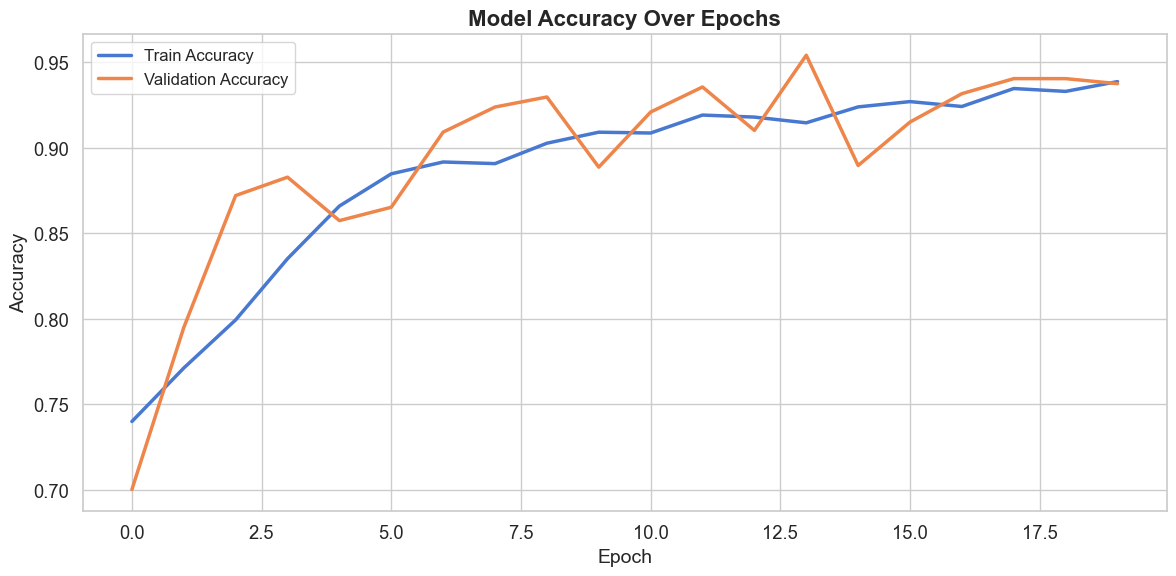

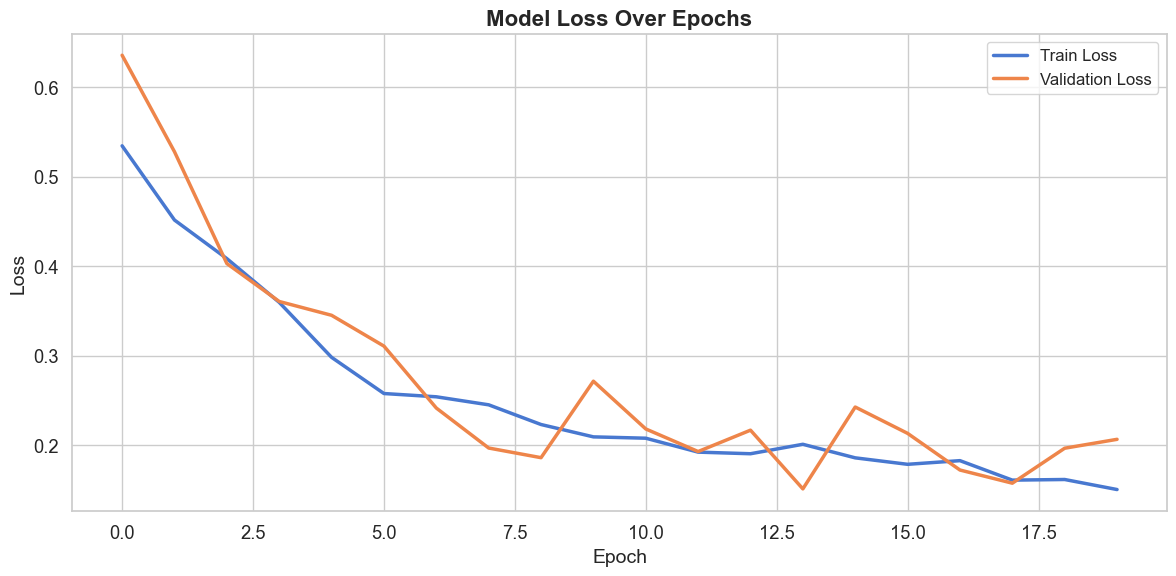

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Plot the accuracy
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Train Accuracy', linewidth=2.5)
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)
plt.title('Model Accuracy Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# Plot the loss
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Train Loss', linewidth=2.5)
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss', linewidth=2.5)
plt.title('Model Loss Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


In [11]:
from tensorflow.keras.models import load_model
model = load_model('pneumonia_classification_model.h5')

In [15]:
import pickle
with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)


In [20]:
# Continue training for the remaining 20 epochs (total of 40)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=40,  # Total number of epochs
    initial_epoch=20,  # Start training from epoch 20
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 21/40
131/131 [==============================] - 80s 605ms/step - loss: 0.1626 - accuracy: 0.9332 - val_loss: 0.1893 - val_accuracy: 0.9248
Epoch 22/40
131/131 [==============================] - 80s 614ms/step - loss: 0.1584 - accuracy: 0.9327 - val_loss: 0.1795 - val_accuracy: 0.9209
Epoch 23/40
131/131 [==============================] - 80s 608ms/step - loss: 0.1448 - accuracy: 0.9411 - val_loss: 0.2008 - val_accuracy: 0.9102
Epoch 24/40
131/131 [==============================] - 80s 614ms/step - loss: 0.1433 - accuracy: 0.9401 - val_loss: 0.1450 - val_accuracy: 0.9434
Epoch 25/40
131/131 [==============================] - 80s 609ms/step - loss: 0.1402 - accuracy: 0.9480 - val_loss: 0.2463 - val_accuracy: 0.8926
Epoch 26/40
131/131 [==============================] - 79s 604ms/step - loss: 0.1457 - accuracy: 0.9408 - val_loss: 0.1543 - val_accuracy: 0.9307
Epoch 27/40
131/131 [==============================] - 80s 611ms/step - loss: 0.1350 - accuracy: 0.9461 - val_loss: 0.1463 -

In [21]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)

19/19 [==============================] - 6s 296ms/step - loss: 0.3181 - accuracy: 0.8849
Test accuracy: 0.8848684430122375


In [22]:
model.save('pneumonia_classification_model.h5')

In [23]:
import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [24]:
with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

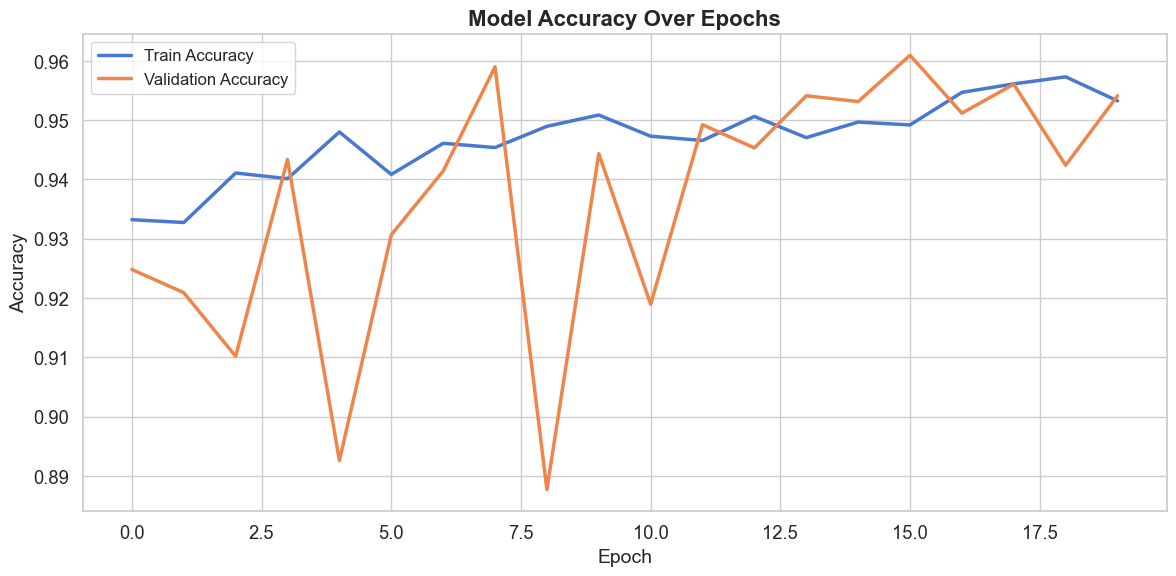

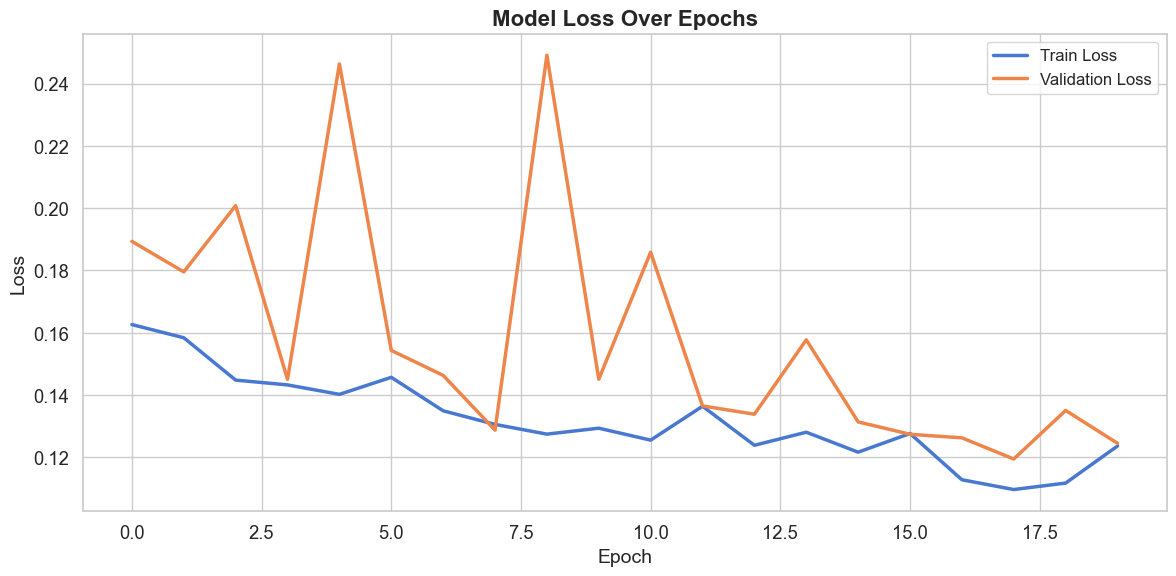

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Plot the accuracy
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Train Accuracy', linewidth=2.5)
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)
plt.title('Model Accuracy Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# Plot the loss
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Train Loss', linewidth=2.5)
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss', linewidth=2.5)
plt.title('Model Loss Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

In [26]:
from tensorflow.keras.models import load_model
model = load_model('pneumonia_classification_model.h5')

In [27]:
import pickle
with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=60, 
    initial_epoch=40,  
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 41/60
131/131 [==============================] - 80s 608ms/step - loss: 0.1209 - accuracy: 0.9506 - val_loss: 0.1289 - val_accuracy: 0.9502
Epoch 42/60
131/131 [==============================] - 78s 598ms/step - loss: 0.1176 - accuracy: 0.9521 - val_loss: 0.1321 - val_accuracy: 0.9502
Epoch 43/60
131/131 [==============================] - 78s 596ms/step - loss: 0.1239 - accuracy: 0.9518 - val_loss: 0.1231 - val_accuracy: 0.9551
Epoch 44/60
131/131 [==============================] - 79s 605ms/step - loss: 0.1176 - accuracy: 0.9504 - val_loss: 0.1253 - val_accuracy: 0.9521
Epoch 45/60
131/131 [==============================] - 79s 606ms/step - loss: 0.1153 - accuracy: 0.9554 - val_loss: 0.1757 - val_accuracy: 0.9287
Epoch 46/60
131/131 [==============================] - 80s 613ms/step - loss: 0.1105 - accuracy: 0.9563 - val_loss: 0.1488 - val_accuracy: 0.9385
Epoch 47/60
131/131 [==============================] - 79s 604ms/step - loss: 0.1119 - accuracy: 0.9559 - val_loss: 0.1008 -

In [29]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)

19/19 [==============================] - 6s 297ms/step - loss: 0.3128 - accuracy: 0.8980
Test accuracy: 0.8980262875556946


In [30]:
model.save('pneumonia_classification_model.h5')

In [31]:
import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

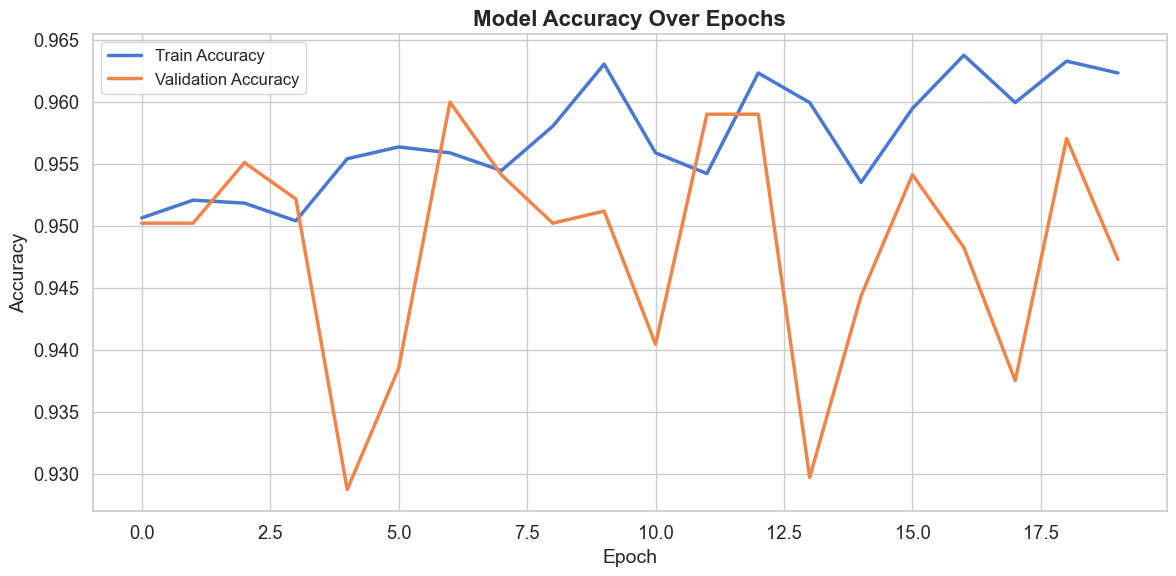

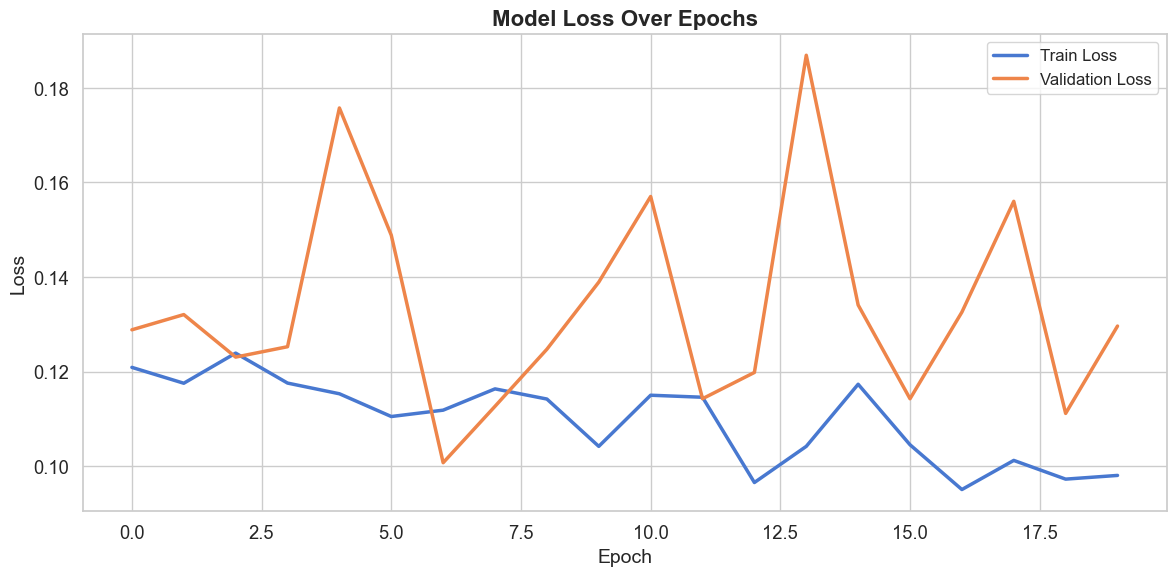

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Train Accuracy', linewidth=2.5)
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)
plt.title('Model Accuracy Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Train Loss', linewidth=2.5)
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss', linewidth=2.5)
plt.title('Model Loss Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

In [33]:
from tensorflow.keras.models import load_model
model = load_model('pneumonia_classification_model.h5')

In [34]:
import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [35]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=80, 
    initial_epoch=60,  
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 61/80
131/131 [==============================] - 80s 610ms/step - loss: 0.1004 - accuracy: 0.9640 - val_loss: 0.1287 - val_accuracy: 0.9482
Epoch 62/80
131/131 [==============================] - 80s 611ms/step - loss: 0.0865 - accuracy: 0.9666 - val_loss: 0.1138 - val_accuracy: 0.9590
Epoch 63/80
131/131 [==============================] - 79s 602ms/step - loss: 0.1021 - accuracy: 0.9597 - val_loss: 0.1301 - val_accuracy: 0.9473
Epoch 64/80
131/131 [==============================] - 80s 608ms/step - loss: 0.0907 - accuracy: 0.9664 - val_loss: 0.1156 - val_accuracy: 0.9600
Epoch 65/80
131/131 [==============================] - 79s 603ms/step - loss: 0.1131 - accuracy: 0.9542 - val_loss: 0.1433 - val_accuracy: 0.9453
Epoch 66/80
131/131 [==============================] - 80s 610ms/step - loss: 0.1002 - accuracy: 0.9592 - val_loss: 0.1092 - val_accuracy: 0.9600
Epoch 67/80
131/131 [==============================] - 80s 611ms/step - loss: 0.0886 - accuracy: 0.9656 - val_loss: 0.1218 -

In [36]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)

19/19 [==============================] - 6s 293ms/step - loss: 0.4389 - accuracy: 0.8964
Test accuracy: 0.8963815569877625


In [37]:
model.save('pneumonia_classification_model.h5')

In [38]:
import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

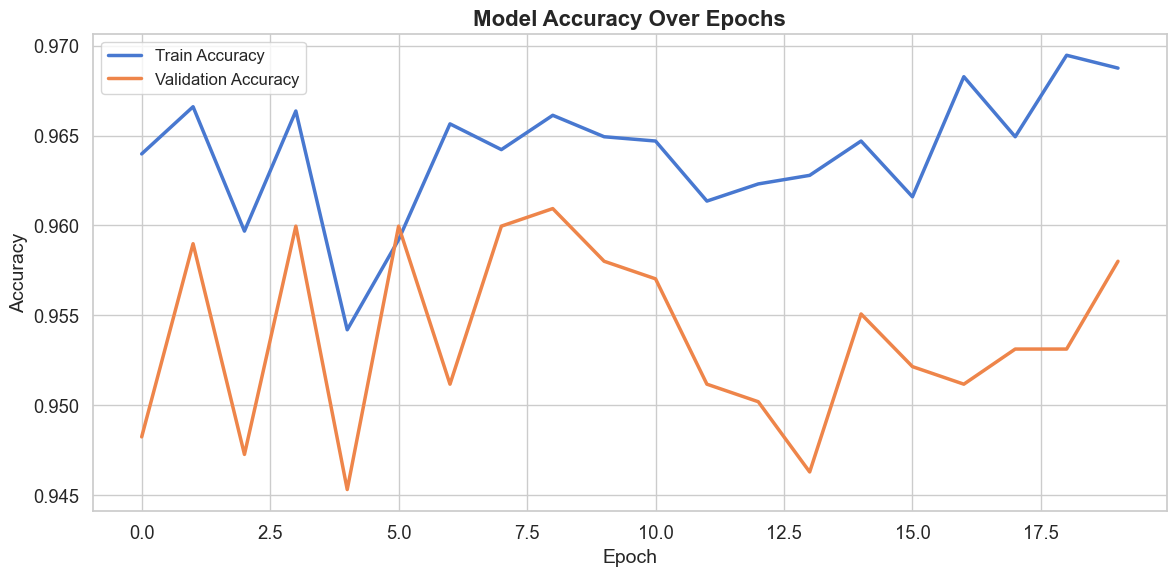

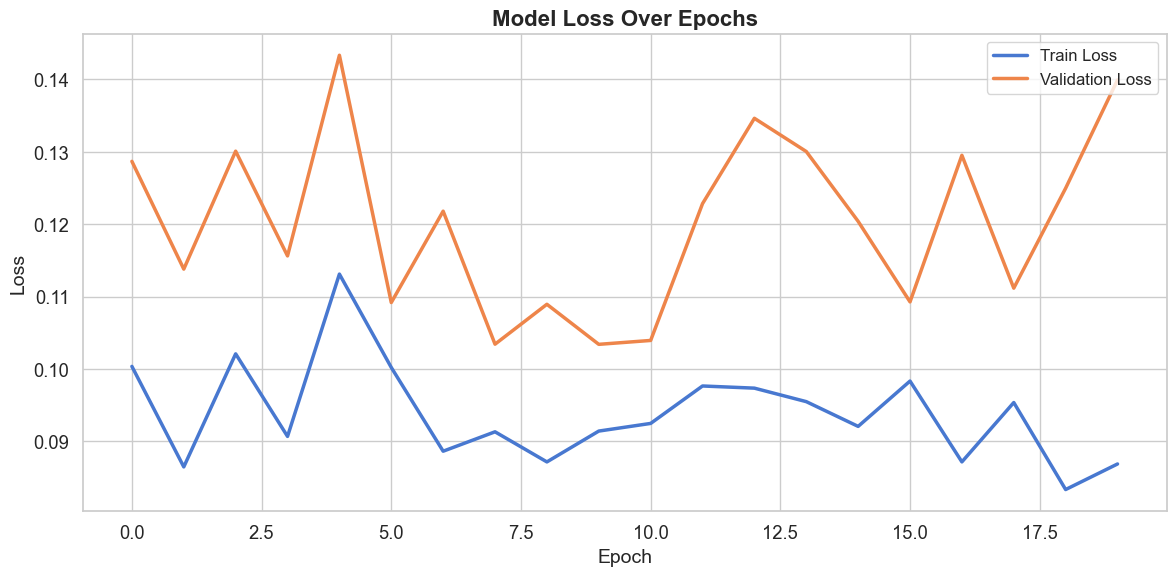

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Train Accuracy', linewidth=2.5)
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)
plt.title('Model Accuracy Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Train Loss', linewidth=2.5)
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss', linewidth=2.5)
plt.title('Model Loss Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

In [40]:
from tensorflow.keras.models import load_model
model = load_model('pneumonia_classification_model.h5')

In [41]:
import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [42]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100, 
    initial_epoch=80,  
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 81/100
131/131 [==============================] - 80s 609ms/step - loss: 0.0815 - accuracy: 0.9692 - val_loss: 0.1169 - val_accuracy: 0.9512
Epoch 82/100
131/131 [==============================] - 81s 619ms/step - loss: 0.0862 - accuracy: 0.9678 - val_loss: 0.1072 - val_accuracy: 0.9590
Epoch 83/100
131/131 [==============================] - 82s 629ms/step - loss: 0.0832 - accuracy: 0.9680 - val_loss: 0.1378 - val_accuracy: 0.9395
Epoch 84/100
131/131 [==============================] - 83s 631ms/step - loss: 0.0956 - accuracy: 0.9616 - val_loss: 0.1014 - val_accuracy: 0.9619
Epoch 85/100
131/131 [==============================] - 80s 613ms/step - loss: 0.0897 - accuracy: 0.9666 - val_loss: 0.1185 - val_accuracy: 0.9502
Epoch 86/100
131/131 [==============================] - 81s 617ms/step - loss: 0.0935 - accuracy: 0.9645 - val_loss: 0.1256 - val_accuracy: 0.9531
Epoch 87/100
131/131 [==============================] - 81s 616ms/step - loss: 0.0924 - accuracy: 0.9633 - val_loss: 0

In [43]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)

19/19 [==============================] - 5s 286ms/step - loss: 0.2446 - accuracy: 0.9128
Test accuracy: 0.9128289222717285


In [44]:
model.save('pneumonia_classification_model.h5')

In [45]:
import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

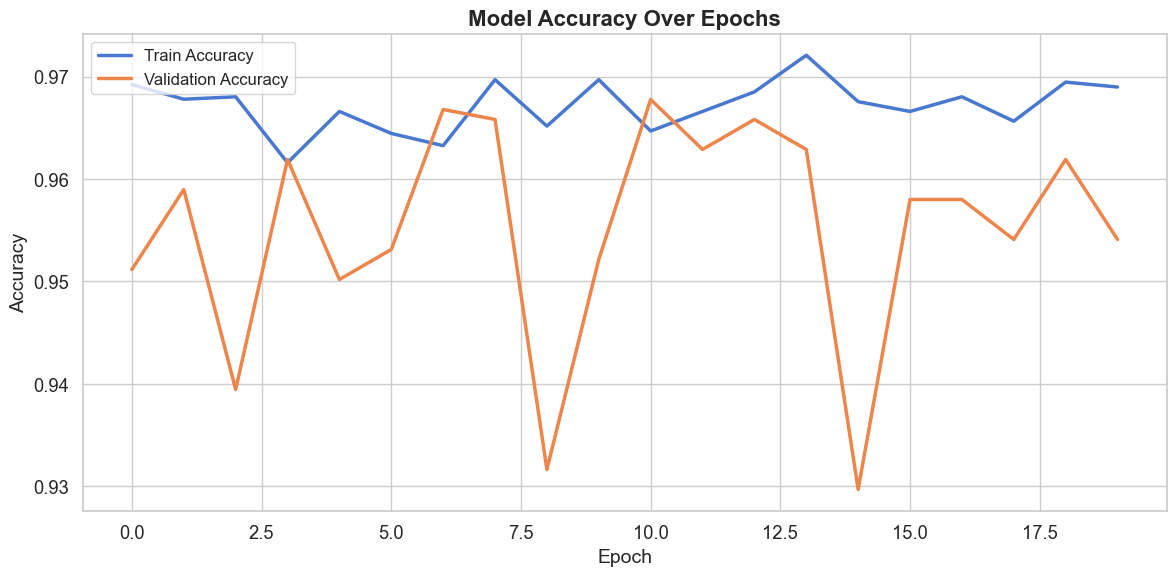

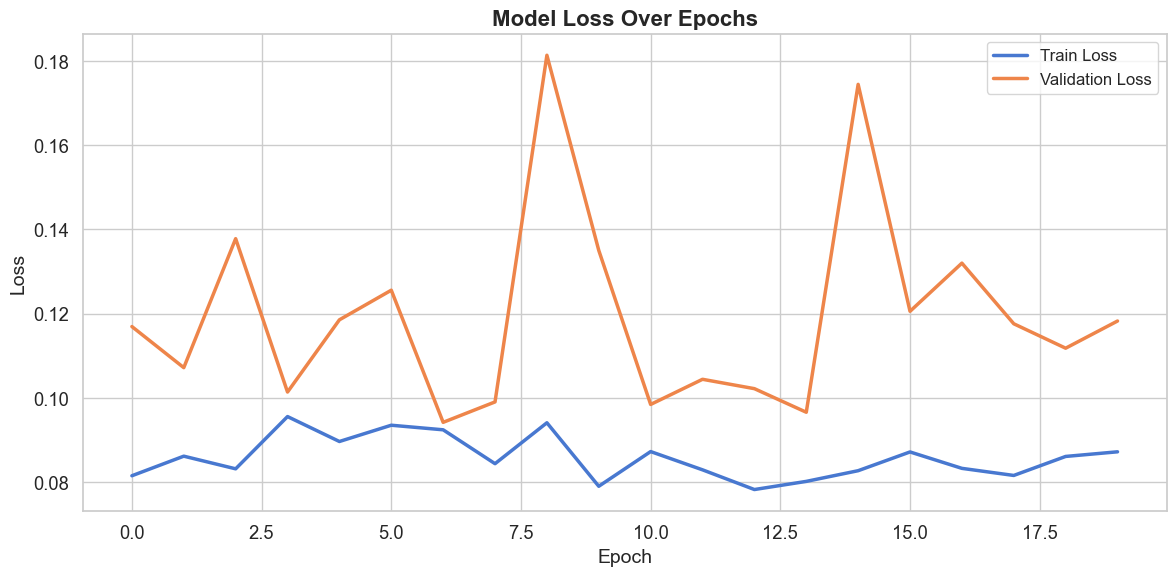

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Train Accuracy', linewidth=2.5)
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)
plt.title('Model Accuracy Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Train Loss', linewidth=2.5)
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss', linewidth=2.5)
plt.title('Model Loss Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

In [47]:
from tensorflow.keras.models import load_model
model = load_model('pneumonia_classification_model.h5')

In [48]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=120, 
    initial_epoch=100,  
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 101/120
131/131 [==============================] - 81s 618ms/step - loss: 0.0818 - accuracy: 0.9671 - val_loss: 0.1037 - val_accuracy: 0.9570
Epoch 102/120
131/131 [==============================] - 82s 624ms/step - loss: 0.0866 - accuracy: 0.9659 - val_loss: 0.1258 - val_accuracy: 0.9453
Epoch 103/120
131/131 [==============================] - 81s 618ms/step - loss: 0.0697 - accuracy: 0.9716 - val_loss: 0.1656 - val_accuracy: 0.9336
Epoch 104/120
131/131 [==============================] - 82s 624ms/step - loss: 0.0857 - accuracy: 0.9692 - val_loss: 0.1265 - val_accuracy: 0.9521
Epoch 105/120
131/131 [==============================] - 81s 617ms/step - loss: 0.0720 - accuracy: 0.9733 - val_loss: 0.1109 - val_accuracy: 0.9629
Epoch 106/120
131/131 [==============================] - 81s 615ms/step - loss: 0.0757 - accuracy: 0.9740 - val_loss: 0.1033 - val_accuracy: 0.9580
Epoch 107/120
131/131 [==============================] - 81s 616ms/step - loss: 0.0927 - accuracy: 0.9676 - val_

In [49]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)

19/19 [==============================] - 5s 280ms/step - loss: 0.2716 - accuracy: 0.9260
Test accuracy: 0.9259868264198303


In [50]:
model.save('pneumonia_classification_model.h5')

In [51]:
import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

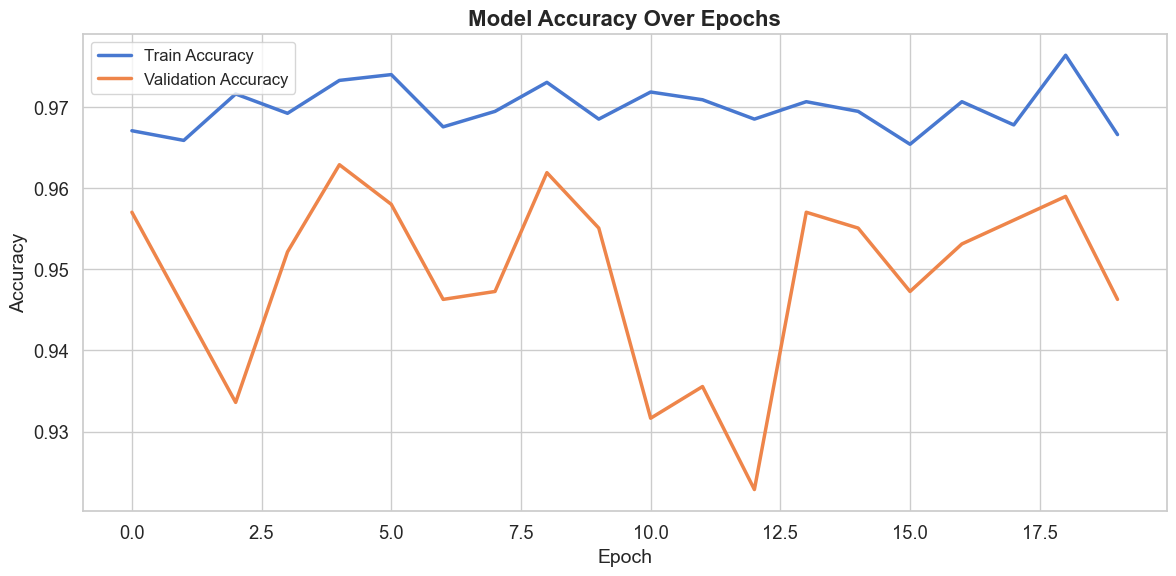

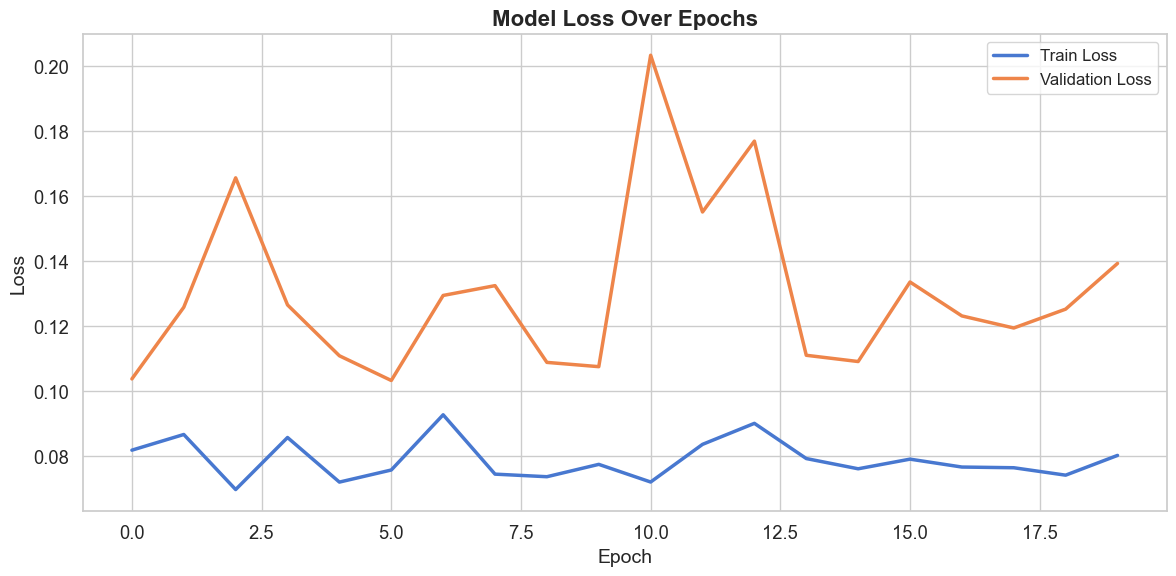

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Train Accuracy', linewidth=2.5)
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)
plt.title('Model Accuracy Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Train Loss', linewidth=2.5)
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss', linewidth=2.5)
plt.title('Model Loss Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

In [53]:
from tensorflow.keras.models import load_model
model = load_model('pneumonia_classification_model.h5')

In [54]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=140, 
    initial_epoch=120,  
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 121/140
131/131 [==============================] - 82s 623ms/step - loss: 0.0773 - accuracy: 0.9673 - val_loss: 0.1371 - val_accuracy: 0.9502
Epoch 122/140
131/131 [==============================] - 80s 613ms/step - loss: 0.0808 - accuracy: 0.9709 - val_loss: 0.1691 - val_accuracy: 0.9443
Epoch 123/140
131/131 [==============================] - 79s 605ms/step - loss: 0.0691 - accuracy: 0.9726 - val_loss: 0.1129 - val_accuracy: 0.9600
Epoch 124/140
131/131 [==============================] - 80s 614ms/step - loss: 0.0654 - accuracy: 0.9759 - val_loss: 0.1263 - val_accuracy: 0.9531
Epoch 125/140
131/131 [==============================] - 79s 605ms/step - loss: 0.0749 - accuracy: 0.9714 - val_loss: 0.1168 - val_accuracy: 0.9531
Epoch 126/140
131/131 [==============================] - 80s 612ms/step - loss: 0.0735 - accuracy: 0.9738 - val_loss: 0.1185 - val_accuracy: 0.9551
Epoch 127/140
131/131 [==============================] - 81s 616ms/step - loss: 0.0748 - accuracy: 0.9735 - val_

In [55]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)

19/19 [==============================] - 5s 283ms/step - loss: 0.3034 - accuracy: 0.8997
Test accuracy: 0.8996710777282715


In [3]:
from tensorflow.keras.models import load_model
model = load_model('pneumonia_classification_model.h5')

In [6]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
